In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cv2.__version__

'3.4.2'

## Helpers

In [3]:
def show_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
def show_grayscale_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')
    
all_contours =  -1
green = (0,255,0)
thickness = 2


## Contours

We convert the image to grayscale and apply Gaussian blur, then apply Canny to detect the edges.

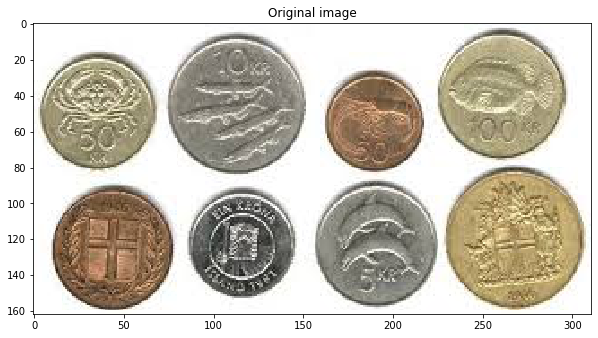

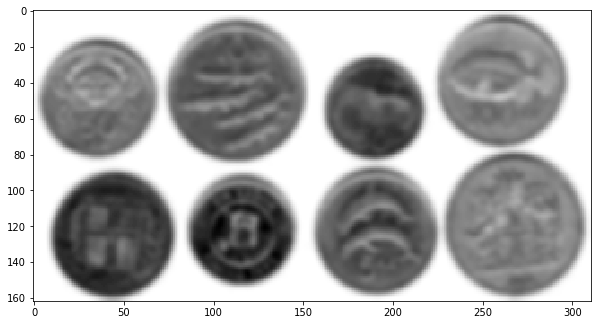

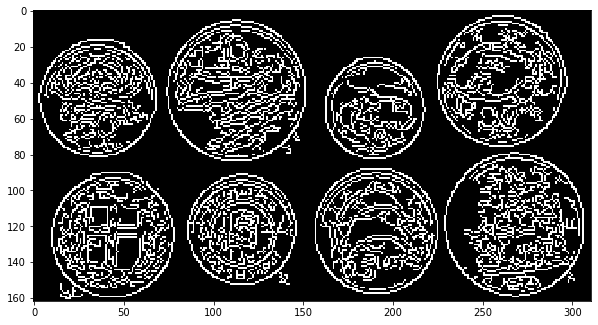

In [4]:
coins = cv2.imread("img/coins.jpeg")

show_img(coins, "Original image")

grayscale_coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

gaussianBlur = cv2.GaussianBlur(grayscale_coins, (9,9), -1)
show_grayscale_img(gaussianBlur)

edges = cv2.Canny(grayscale_coins, 0, 255)
show_grayscale_img(edges)

In [5]:
len(edges)

162

``RETR_EXTERNAL``  is for finding the outer edges.

In [6]:
coins_contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# in version 3.4 we need to access index 1 of coins_contours, different in V4
print(f"Found {len(coins_contours[1])} contours")

Found 40 contours


### Drawing the contours onto the original image

In [7]:
cv2.drawContours(coins, coins_contours[1], -1, (0,255,0), 1);


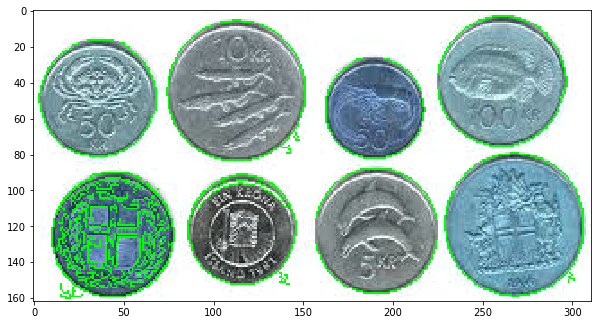

In [8]:
show_grayscale_img(coins)

In [9]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [10]:
contour_areas = get_contour_areas(coins_contours[1])
print(f"Contour areas before sorting {contour_areas}")

Contour areas before sorting [0.0, 8.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.5, 1.5, 0.0, 3.5, 0.0, 0.0, 31.5, 0.5, 0.0, 0.0, 74.5, 0.0, 3.5, 1.0, 4.0, 0.5, 3.5, 1.5, 0.0, 19.0, 0.0, 0.0, 0.0, 0.0, 73.5, 2616.0, 76.5, 3757.5, 4835.0, 2429.0, 3301.5, 4737.0, 4037.0]


In [11]:
sorted_contour_areas = sorted(coins_contours[1], key=cv2.contourArea, reverse=True)
#print(f"Contour areas after sorting {sorted_contour_areas}")

In [12]:
big_contours_only = sorted_contour_areas[0:8]
print(f"Big contours are {big_contours_only}")

Big contours are [array([[[266,  79]],

       [[265,  80]],

       [[264,  80]],

       [[263,  80]],

       [[262,  80]],

       [[261,  80]],

       [[260,  80]],

       [[259,  80]],

       [[258,  81]],

       [[257,  81]],

       [[256,  81]],

       [[255,  82]],

       [[254,  82]],

       [[253,  82]],

       [[252,  83]],

       [[251,  83]],

       [[250,  83]],

       [[249,  84]],

       [[248,  85]],

       [[247,  85]],

       [[246,  86]],

       [[245,  87]],

       [[244,  88]],

       [[243,  88]],

       [[242,  89]],

       [[241,  90]],

       [[240,  91]],

       [[240,  92]],

       [[239,  93]],

       [[238,  94]],

       [[237,  95]],

       [[236,  96]],

       [[236,  97]],

       [[235,  98]],

       [[235,  99]],

       [[234, 100]],

       [[233, 101]],

       [[233, 102]],

       [[233, 103]],

       [[232, 104]],

       [[232, 105]],

       [[231, 106]],

       [[231, 107]],

       [[231, 108]],

       [[230, 

In [13]:
coins_again = cv2.imread("img/coins.jpeg")


In [14]:
cv2.drawContours(coins_again, big_contours_only, -1, (0,255,0), 1);

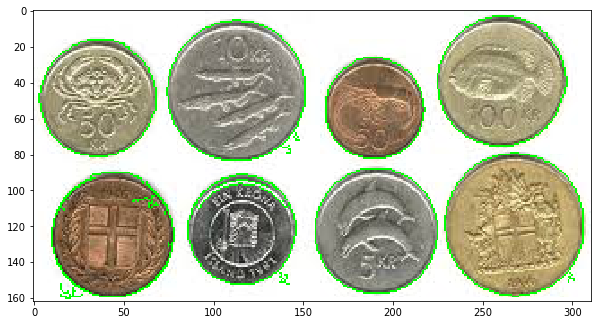

In [15]:
show_img(coins_again)

## By x coordinate (left to right)

In [16]:
def get_contour_x_center_coordinate(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return int(M['m10']/M['m00'])

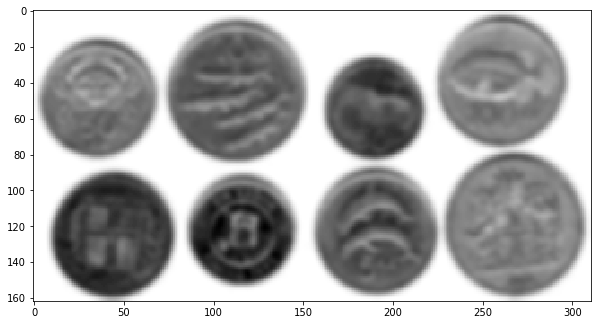

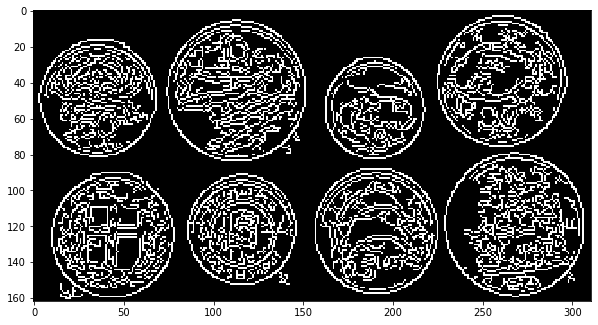

In [17]:
coins_once_again = cv2.imread("img/coins.jpeg")
grayscale_coins = cv2.cvtColor(coins_once_again, cv2.COLOR_BGR2GRAY)

gaussianBlur = cv2.GaussianBlur(grayscale_coins, (9,9), -1)
show_grayscale_img(gaussianBlur)

edges = cv2.Canny(grayscale_coins, 0, 255)
show_grayscale_img(edges)

coins_contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [18]:
sorted_contours_left_to_right = sorted(coins_contours[1], key=get_contour_x_center_coordinate)

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [19]:
# commonly used function
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


In [20]:
sorted_contours, boxes = sort_contours(coins_contours[1])

cv2.drawContours(coins_once_again, sorted_using_sort_method, -1, (0,255,0), 1);
#show_img(coins_once_again)

NameError: name 'sorted_using_sort_method' is not defined

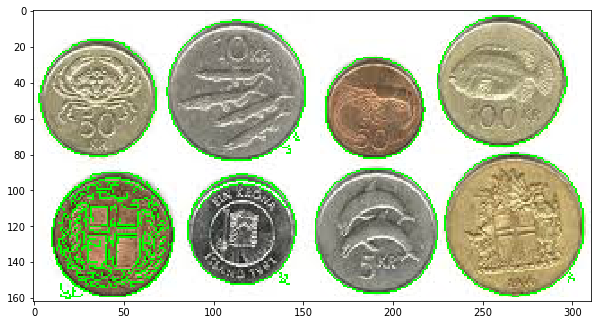

In [21]:
for idx, c in enumerate(sorted_contours):
    if idx > 8:
        break
    cv2.drawContours(coins_once_again, [c], -1, (0,255,0), 2)
    
show_img(coins)

In [22]:
bingo = cv2.imread("img/bingo.jpeg")

## Approximating contours

Found 1 lines


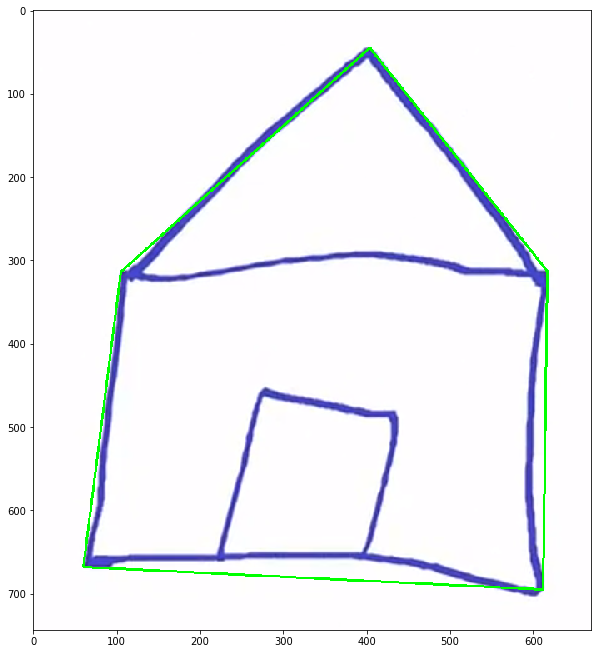

In [29]:
house = cv2.imread("img/house.png")

grayscale_house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayscale_house, 0, 255)

house_contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(f"Found {len(house_contours[1])} lines")

for c in house_contours[1]:
    accuracy = 0.05
    perimeter = cv2.arcLength(c, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    cv2.drawContours(house, [approx], 0, (0, 255, 0), 2)
    
    show_img(house)

Found 1 lines


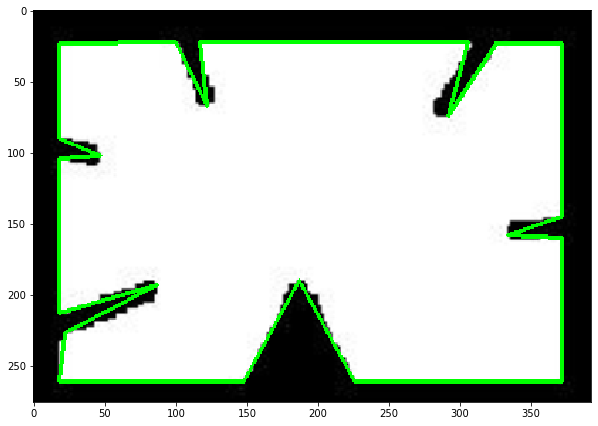

In [41]:
figure = cv2.imread("img/figure.png")

grayscale_figure = cv2.cvtColor(figure, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayscale_figure, 0, 255)

figure_contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(f"Found {len(figure_contours[1])} lines")

for c in figure_contours[1]:
    accuracy = 0.01
    perimeter = cv2.arcLength(c, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    cv2.drawContours(figure, [approx], 0, (0, 255, 0), 2)
    
    show_img(figure)

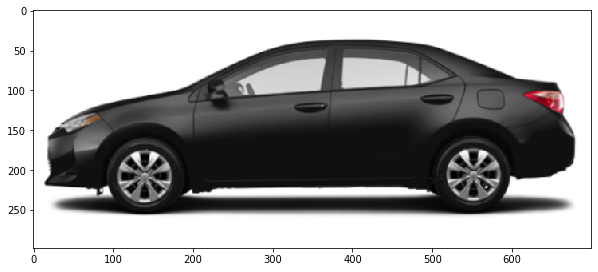

In [60]:
img = cv2.imread("img/car2.png")
show_img(img)

## Convex Hull

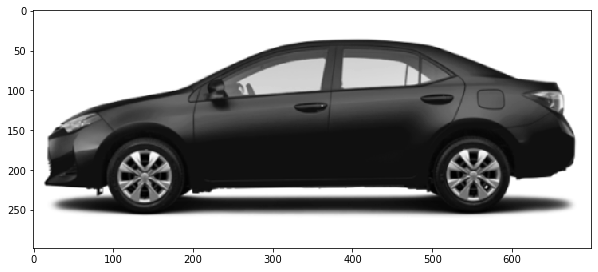

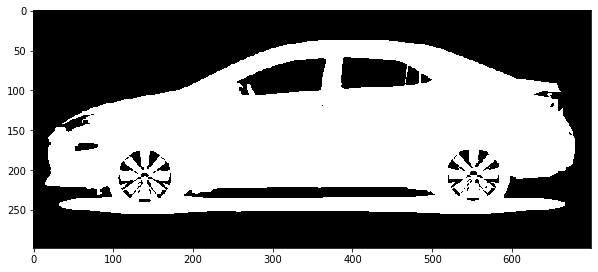

In [61]:
img_clone = np.copy(img)
img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2GRAY)
show_grayscale_img(img_clone)
ret, thresh = cv2.threshold(img_clone, 127, 180, cv2.THRESH_BINARY_INV)
show_grayscale_img(thresh)

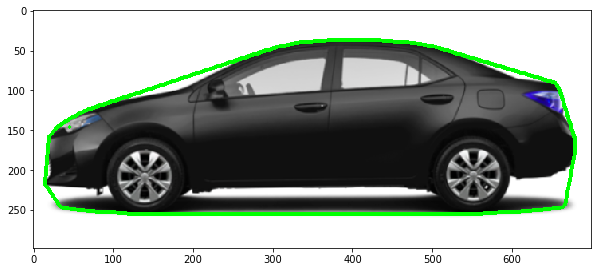

In [56]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours[1]:
    hull = cv2.convexHull(contour)
    cv2.drawContours(img, [hull], 0, (0, 255, 0), 3)

show_grayscale_img(img)

## Bounding rectangle

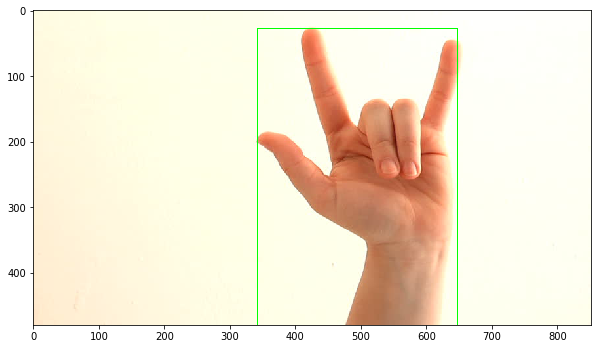

In [139]:
hand = cv2.imread("img/hand.jpg")
hand_gray = cv2.imread("img/hand.jpg", 0)
#show_img(hand)

ret, thresh = cv2.threshold(hand_gray, 200, 225, cv2.THRESH_BINARY_INV)
x, y, w, h = cv2.boundingRect(thresh)

cv2.rectangle(hand, (x,y), (x+w, y+h), (0,255,0), 1);

show_img(hand )

## Minimum enclosing circle

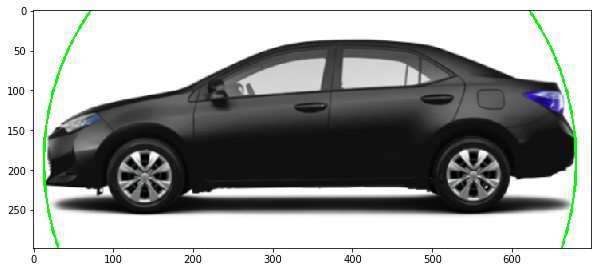

In [97]:
img = cv2.imread("img/car2.png")

img_clone = np.copy(img)
img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2GRAY)
#show_grayscale_img(img_clone)
ret, thresh = cv2.threshold(img_clone, 220, 225, cv2.THRESH_BINARY_INV)
#show_grayscale_img(thresh)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

(x, y), radius = cv2.minEnclosingCircle(contours[1][0])

center = (int(x), int(y))
radius = int(radius)

cv2.circle(img, center, radius, (0, 255, 0), 2)
show_grayscale_img(img, "Minimum enclosing circle")

### Mini challenge: creating a circle around this image of a coin

Found 4032 contours


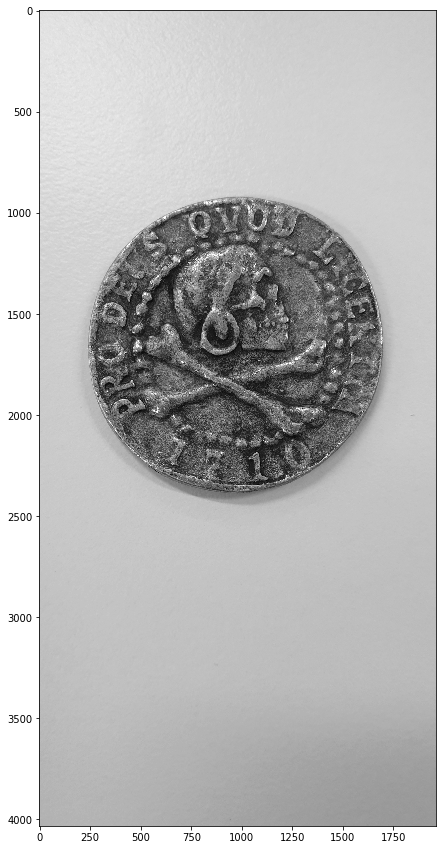

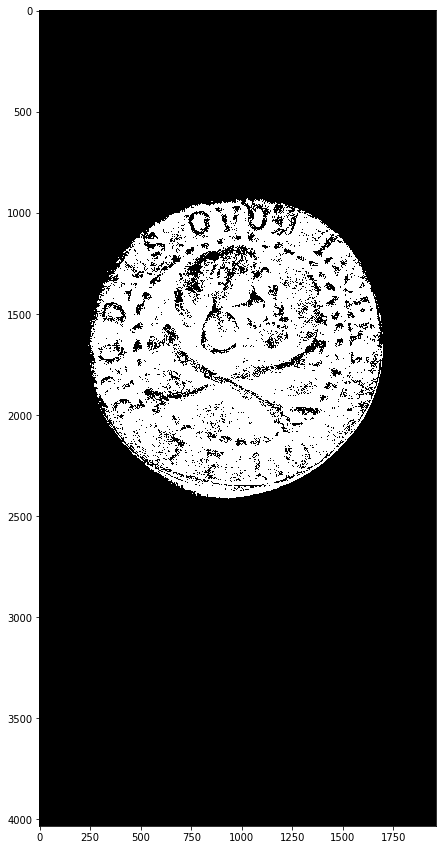

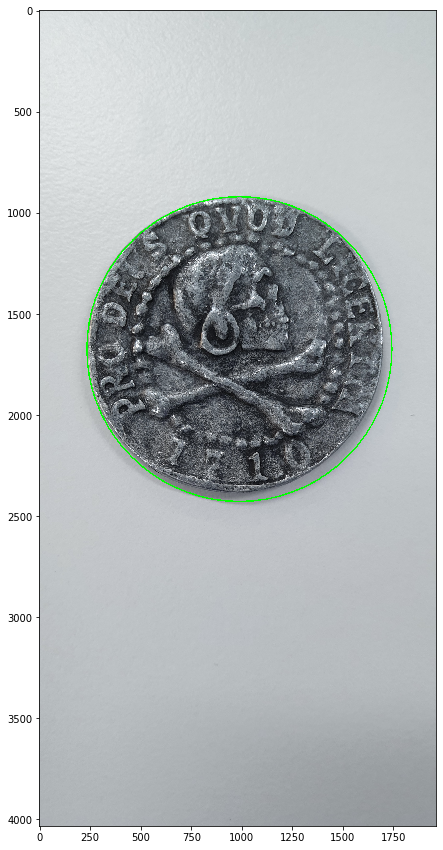

In [143]:
img = cv2.imread("img/coin.jpg")

img_clone = np.copy(img)
img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2GRAY)
show_grayscale_img(img_clone)

# we don't have enough contrast so let's apply gaussian blur
gaussianBlur = cv2.GaussianBlur(img_clone, (3,3), -1)

ret, thresh = cv2.threshold(gaussianBlur, 127, 180, cv2.THRESH_BINARY_INV)
show_grayscale_img(thresh)

contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

print(f"Found {len(contours[0])} contours")

#that's too many, so let's just pick the biggest one by sorting by contourArea, and selecting the first item

biggest = sorted(contours[1], key=cv2.contourArea, reverse=True)
(x, y), radius = cv2.minEnclosingCircle(biggest[0])

center = (int(x), int(y))
radius = int(radius)

cv2.circle(img, center, radius, (0, 255, 0), 5)
show_grayscale_img(img)



## TODO Fitting an ellipse

In [ ]:
img = cv2.imread("img/car2.png")

img_gray = cv2.imread("img/car2.png", 0)
img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2GRAY)
#show_grayscale_img(img_clone)
ret, thresh = cv2.threshold(img_clone, 220, 225, cv2.THRESH_BINARY_INV)
#show_grayscale_img(thresh)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

(x, y), radius = cv2.minEnclosingCircle(contours[1][0])

center = (int(x), int(y))
radius = int(radius)

cv2.circle(img, center, radius, (0, 255, 0), 2)
show_grayscale_img(img, "Minimum enclosing circle")

## Fitting contours